In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
label_distr=dict(positive=15834,
    negative=8916,
    neutral=3687,
    unlabeled=2177)
label_df = pd.DataFrame(label_distr, index=[1])


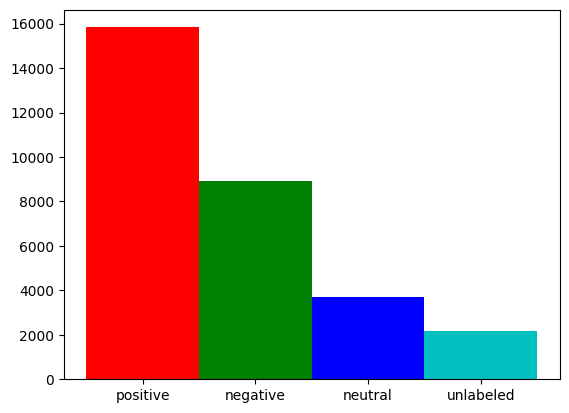

In [37]:
plt.bar(label_distr.keys(), label_distr.values(), 1, color=['r', 'g', 'b', 'c'])
plt.show()

2177